# Agenda
1. Why Tensorflow ?
2. What's new with TensorFlow 2.0 ?
3. Basic Image Classification using TensorFlow


<hr>

#### 1. Why TensorFlow ?
- Open Source Scientific Computing Library by Google
- Written in C++ backend & python as wrapper
- ~2000 contributers world wide.
- Tensor is fancy word for array.
- Comprehensive, Flexible Ecosystem of tools, library & community.
- Tensorflow generates data flow graph which doesn't need python anymore to execute
   
   <img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/mod2-1.png?raw=true">
   
<hr>

#### 2. What's new with TensorFlow 2.0 ?
- <u>Focus on Ease of Use</u>
- Ease of use for beginners & experts
- Keras as default higher level API
- Eager Execution is default now

- <u>Focus on Clarity</u>
- Remove duplicate functionality
- Consistent, intuitive syntex across all API
- Compatibility

- <u>Focus on Flexibility</u>
- Using lower level APIs
- Inheritable interfaces
- Tensorflow RAW APIs

- <u>Software engineering best practices applied to deep learning</u>
- Model Subclassing

- <u>Large Scale Training Simplified</u>

- <b>Ease of Deployment</b>

<img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/mod2-2-new.png?raw=true">


- <b>Training WorlFlow</b>
<img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/mod2-3.png?raw=true">


- TensorBoard

- Performance Profiling

- Training & Deployment Performance
<img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/mod2-4.png?raw=true">
<img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/mod2-5.png?raw=true">

- Tensorflow brings more to the table
<img src="https://github.com/zekelabs/tensorflow2.0-tutorial/blob/master/img/Mod2-6.png?raw=true">



<hr>

#### 3. Basic Image Classification using TensorFlow

Import tensorflow & keras

In [1]:
import tensorflow as tf
from tensorflow import keras

Import & visualize fashion dataset

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels.shape

(60000,)

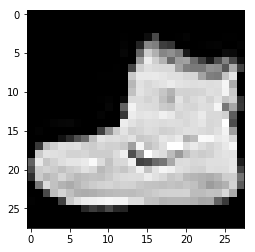

In [21]:
plt.imshow(train_images[0],cmap='gray')

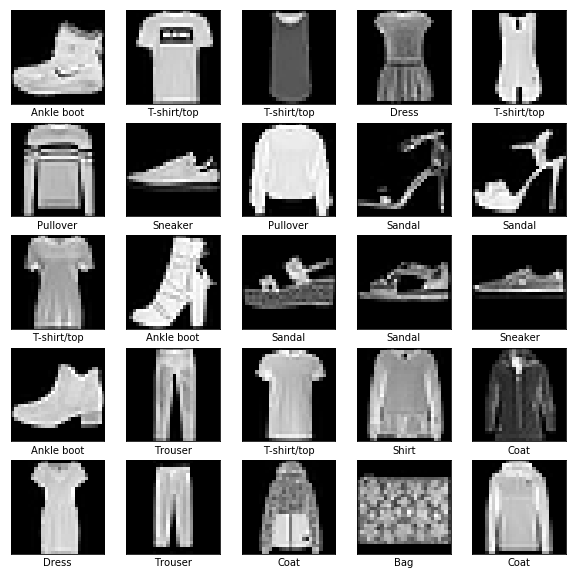

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Preprocess image data in the range of 0 to 1 before feeding to neural networks

In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Build Models
* Flatten — transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
* Dense — These are densely connected, or fully connected, neural layers
* Activation — relu activation function at intermediate layers & softmax at last layer
* 10 — because, 10 class classification has to be done

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### Compile Model
* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Model Training

In [30]:
model.fit(train_images, train_labels, epochs=10)

W0724 15:30:22.233637 139920248309568 deprecation.py:323] From /home/awantik/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5002 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3775 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3382 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3141 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2946 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2809 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2666 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2570 - accuracy: 0.9037
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2465 - accuracy: 0.9083
Epoch 10/10
60

#### Evaluate Model with unseen data

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3342 - accuracy: 0.8832

Test accuracy: 0.8832


#### Make predictions

In [35]:
model.predict(test_images[:1])

array([[3.4716926e-08, 4.3950912e-11, 6.3897387e-10, 6.3146793e-11,
        7.9857232e-09, 8.8911841e-04, 3.5364138e-08, 1.1587463e-03,
        3.4026988e-09, 9.9795204e-01]], dtype=float32)

In [36]:
model.predict_classes(test_images[:1])

array([9])

In [37]:
test_labels[0]

9

In [38]:
res = model.predict(test_images[:1])

In [39]:
import numpy as np

In [40]:
np.argsort(res)

array([[1, 3, 2, 8, 4, 0, 6, 5, 7, 9]])

In [41]:
class_names[9]

'Ankle boot'

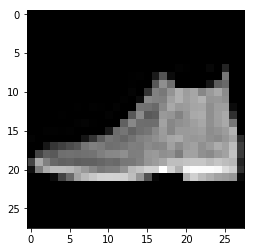

In [43]:
plt.imshow(test_images[0],cmap='gray')